<a href="https://colab.research.google.com/github/omaimajameel11/OIBSIP_TASKNO3/blob/main/emailspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df=pd.read_csv("/content/spam.csv",encoding="latin-1")

In [ ]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df=df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

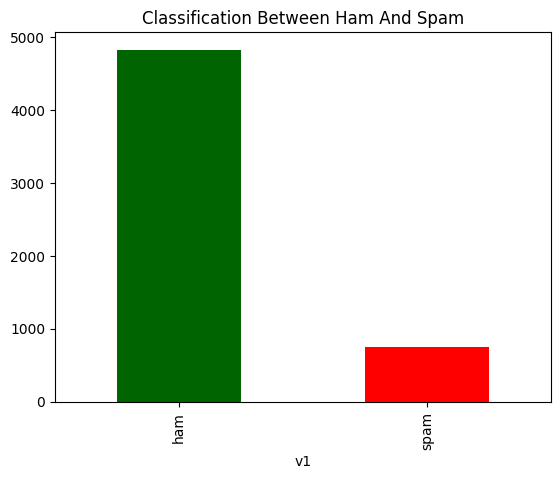

In [ ]:
#Classify the emails
import matplotlib.pyplot as plt
df2=pd.value_counts(df["v1"])
df2.plot(kind="bar",color= ["darkgreen", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Simplify the data
for i in range(0,5572):
    if df['v1'][i]=='spam':
        df['v1'][i]=1
    else:
        df['v1'][i]=0

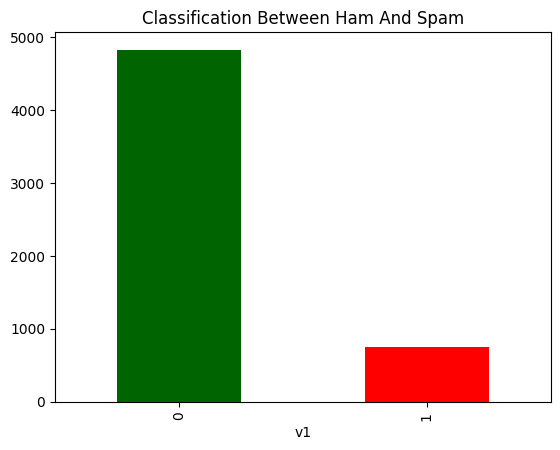

In [ ]:
import matplotlib.pyplot as plt
df2=pd.value_counts(df["v1"])
df2.plot(kind="bar",color= ["darkgreen", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.v2, df.v1,test_size=0.3, random_state=42 )

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [ ]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
2505    0
2525    0
4975    0
650     0
4463    0
Name: v1, Length: 1672, dtype: object

In [ ]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [ ]:
y_train

708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 3900, dtype: object

In [ ]:
y_test

3245    0
944     0
1044    1
2484    0
812     1
       ..
2505    0
2525    0
4975    0
650     0
4463    0
Name: v1, Length: 1672, dtype: object

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
#Converting Data into Integer
y_train=y_train.astype(int)

In [ ]:
x_train_new=x_train_new.astype(int)

In [ ]:
x_train_new

<3900x7206 sparse matrix of type '<class 'numpy.int64'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [ ]:
y_test=y_test.astype(int)

In [ ]:
#Applying Logistic Regression

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(cv.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)

In [ ]:
#Obtaining the accuracy
f1_score(y_test, lr_pred)

0.9090909090909092

 90% Accuracy obtained